In [3]:
import math
import numpy.ma as ma
import numpy as np
import matplotlib.pyplot as plt
# trajectories of I(n) and dI(n)
def fig2(k_T, k, x, delta):
    '''ODE system modeling a single optical nonlinear resonator
    Args:
        k_T: w0/Q, total linewidth of the resonator given its resonance angular frequency ω0 and loaded
quality factor Q
        k_W: waveguid linewidth
        k_L: loss linewidth
        k_T = k_W + k_L
        -----
        delta: delta = w0-w, the detuning of the resonance frequency from the drive field
        x: Chi, dispersive non-linear coefficient, strength of the optical Kerr effect, defined as the angular
frequency shift per photon inside the resonator.
        u: coherent drive/input amplitude, normalized to sqr(# Photons/time)
           input flux I = |u|^2
        z: complex mode amplitude of Kerr-nonlinear resonator, represents dynamics of a single resonant mode
           number of photons n := |z|^2
    return: n vs u
    '''
    a = x**2 / k
    b = 2*delta*x /k
    c = (k_T**2 /4 + delta**2)/k
    d = 0
    #p0=153.63*math.sqrt(abs(x))
    lower_limit = 0
    upper_limit = 400
    num_pts = 200
    n = np.linspace(lower_limit, upper_limit, num_pts)
    I = np.polyval([a,b,c,d], n)
    dI = np.polyval([3*a,2*b,c], n)
    u = [math.sqrt(i) for i in I]
    
    plt.xlabel('Pump Amplitude u')
    plt.ylabel('Energy Cavity n')
    Delta_th= -math.sqrt(3)/2.0 * K_T
    m = dI <= 0
    plt.plot(np.ma.array(u, mask=m), np.ma.array(n, mask=m), '-', lw=1.5, label="$\Delta = {:.1f} \Delta_{{th}}$".format(delta/Delta_th))
    m = dI > 0
    plt.plot(np.ma.array(u, mask=m), np.ma.array(n, mask=m), '--', lw=1.5)
    
    
        

[-66.68395609140178, -95.26279441628826, -104.78907385791709, -123.84163274117473]


Text(0.5, 1.0, 'Steady State Photon Numbers')

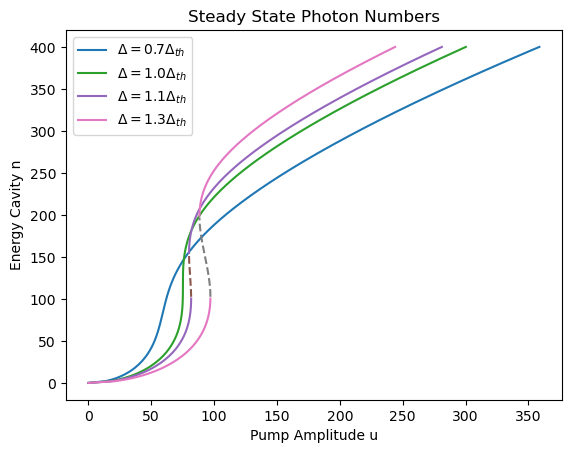

In [4]:
x = 0.55
k=150
k_l=50
K = k * abs(x)
K_T=(k+k_l)*abs(x)
Delta_th= -math.sqrt(3)/2.0 * K_T
#Delta=-225.17*x # 1.3K_T
Delta=[0.7*Delta_th, 1.0*Delta_th, 1.1*Delta_th, 1.3*Delta_th]
print(Delta)
for i in Delta:    
    fig2(K_T, K, x, i)
plt.legend()
plt.title('Steady State Photon Numbers')
   

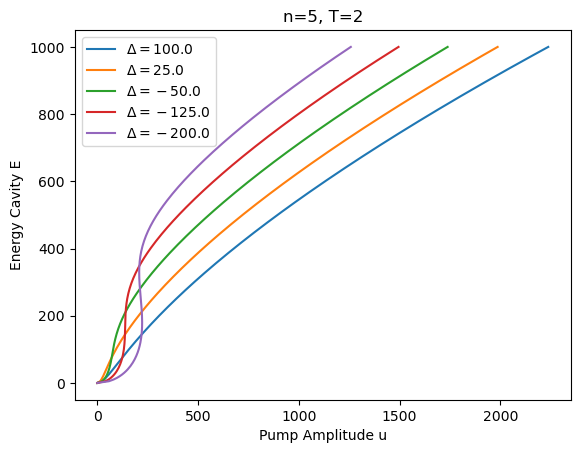

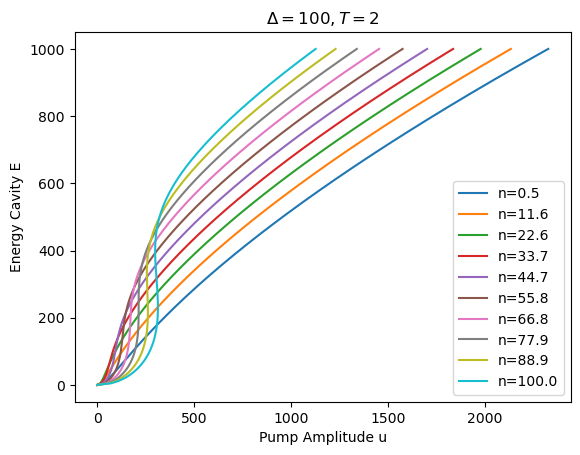

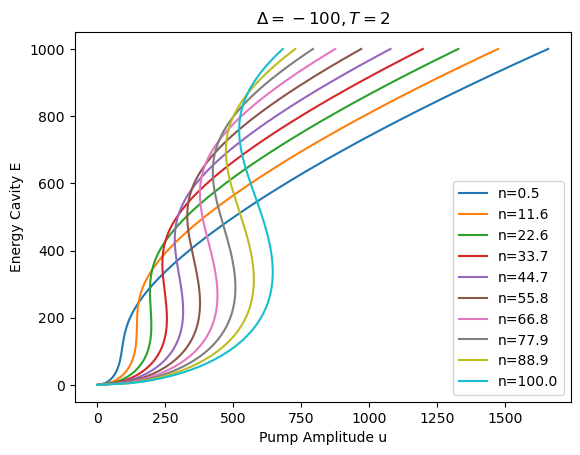

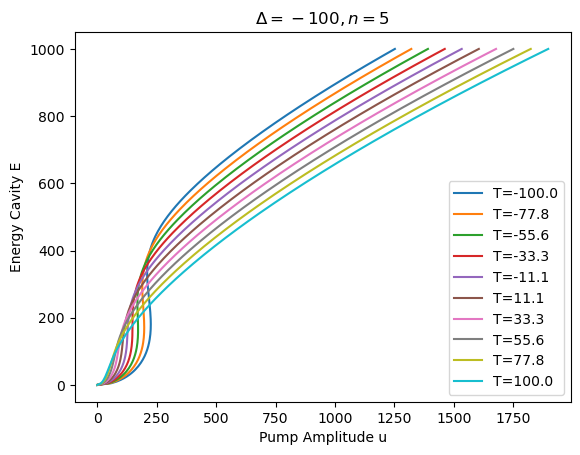

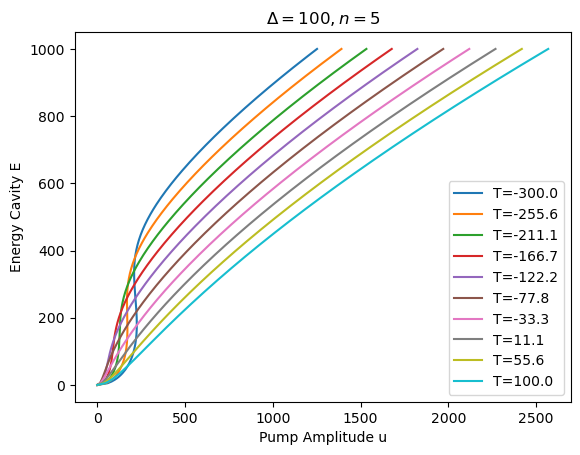

In [37]:
# trajectories of I(n) and dI(n)
def fig2_new(K_T, K, chi, Delta,n,T,gamma_TPA,gamma_FCA,sigma_FCD):
    lower_limit = 0
    upper_limit = 1000
    num_pts = 200
    E = np.linspace(lower_limit, upper_limit, num_pts)
    P = ((K_T/2 + gamma_TPA*E + gamma_FCA * n)**2 + (Delta + chi*E + T -n-sigma_FCD*n**0.8)**2)*E/K
    u = [math.sqrt(i) for i in P]
    
    plt.xlabel('Pump Amplitude u')
    plt.ylabel('Energy Cavity E')
    #Delta_th= -math.sqrt(3)/2.0 * K_T
    #m = dI <= 0
    #plt.plot(np.ma.array(u, mask=m), np.ma.array(n, mask=m), '-', lw=1.5, label="$\Delta = {:.1f} \Delta_{{th}}$".format(delta/Delta_th))
    #m = dI > 0
    #plt.plot(np.ma.array(u, mask=m), np.ma.array(n, mask=m), '--', lw=1.5)
    #line=plt.plot(u,E,label="$\Delta = {:.1f} \Delta_{{th}}$".format(Delta/Delta_th))
    plt.plot(u,E,label='$\Delta={:.1f}$'.format(Delta))
chi = 0.55
k=150
k_l=50
K = k * abs(chi)
K_T=(k+k_l)*abs(chi)
Delta_th= -math.sqrt(3)/2.0 * K_T
gamma_TPA=0.11
gamma_FCA=0.2
sigma_FCD=7.2

# new model, bistability depends on Delta, T and n
Delta=np.linspace(100,-200,num=5)  # Increment from 0.1 to 3 in 10 steps
for i in Delta:
    n=5 ## fix the n, T at first 
    T=2
    fig2_new(K_T, K, chi, i,n,T,gamma_TPA,gamma_FCA,sigma_FCD)
plt.legend()
plt.title('n=5, T=2')
plt.savefig('E_u_curve_nT_fixed.png')
plt.show()

## fixed Delta and T
n = np.linspace(0.5,100,num=10)
ns=[]
for j in n:
    Delta=100
    T=2
    fig2_new(K_T, K, chi, Delta,j,T,gamma_TPA,gamma_FCA,sigma_FCD)
    ns.append("n={:.1f}".format(j))
plt.legend(ns)  
plt.title('$\Delta= 100, T=2$') 
# negative Delta is in the same detuning direction with TPA, 
#therefore more efficient (bistability with less n, less free carriers, less power consumption)
# with positive Delta, it requires much more free carrier density to achieve bistability
plt.savefig('E_u_curve_DeltaT_fixed1.png')
plt.show()
ns=[]
for j in n:
    Delta=-100
    T=2
    fig2_new(K_T, K, chi, Delta,j,T,gamma_TPA,gamma_FCA,sigma_FCD)
    ns.append("n={:.1f}".format(j))
plt.legend(ns)  
plt.title('$\Delta= -100, T=2$') 
# negative Delta is in the same detuning direction with TPA, 
#therefore more efficient (bistability with less n, less free carriers, less power consumption)
# with positive Delta, it requires much more free carrier density to achieve bistability
plt.savefig('E_u_curve_DeltaT_fixed2.png')
plt.show()
#########################################################
## fixed Delta and n
T = np.linspace(-100,100,num=10)
Ts=[]
for k in T:
    Delta=-100
    n=5
    fig2_new(K_T, K, chi, Delta,n,k,gamma_TPA,gamma_FCA,sigma_FCD)
    Ts.append("T={:.1f}".format(k))
plt.legend(Ts)
plt.title('$\Delta= -100, n=5$')  # T and Delta have the same sign, both are against n
# therefore, if Delta is positive, we need either very large n or negative T
plt.savefig('E_u_curve_nDelta_fixed1.png')
plt.show()    

T = np.linspace(-300,100,num=10)
Ts=[]
for k in T:
    Delta=100
    n=5
    fig2_new(K_T, K, chi, Delta,n,k,gamma_TPA,gamma_FCA,sigma_FCD)
    Ts.append("T={:.1f}".format(k))
plt.legend(Ts)
plt.title('$\Delta= 100, n=5$')  # T and Delta have the same sign, both are against n
# therefore, if Delta is positive, we need either very large n or negative T
plt.savefig('E_u_curve_nDelta_fixed2.png')
plt.show()    
